In [4]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input_vgg16
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_input_efficientnet

def load_and_preprocess_image_vgg16(img_path, target_size=(224, 224)):
    """
    Loads an image, resizes it, and preprocesses it for the VGG16 model.

    Args:
        img_path (str): The path to the image file.
        target_size (tuple): The target size for the image (height, width).

    Returns:
        A preprocessed image tensor.
    """
    # Load the image, ensuring it is in RGB format
    img = image.load_img(img_path, target_size=target_size)
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    # Expand dimensions to create a batch of 1
    img_array_expanded = np.expand_dims(img_array, axis=0)
    # Preprocess the image using VGG16-specific preprocessing
    return preprocess_input_vgg16(img_array_expanded)

def load_and_preprocess_image_efficientnet(img_path, target_size=(224, 224)):
    """
    Loads an image, resizes it, and preprocesses it for the EfficientNet model.

    Args:
        img_path (str): The path to the image file.
        target_size (tuple): The target size for the image (height, width).

    Returns:
        A preprocessed image tensor.
    """
    # Load the image, ensuring it is in RGB format
    img = image.load_img(img_path, target_size=target_size)
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    # Expand dimensions to create a batch of 1
    img_array_expanded = np.expand_dims(img_array, axis=0)
    # Preprocess the image using EfficientNet-specific preprocessing
    return preprocess_input_efficientnet(img_array_expanded)

def predict_and_average(vgg16_model_path, efficientnet_model_path, img_path):
    """
    Loads two models, preprocesses an image for each, makes predictions,
    and averages the resulting probabilities.

    Args:
        vgg16_model_path (str): Path to the VGG16 .keras model file.
        efficientnet_model_path (str): Path to the EfficientNet .keras model file.
        img_path (str): Path to the input image.

    Returns:
        A numpy array containing the averaged prediction probabilities.
    """
    try:
        # Load the trained models
        print("Loading models...")
        vgg16_model = tf.keras.models.load_model(vgg16_model_path)
        efficientnet_model = tf.keras.models.load_model(efficientnet_model_path)
        print("Models loaded successfully.")

        # Get input sizes from models
        vgg16_input_shape = vgg16_model.input_shape[1:3]
        efficientnet_input_shape = efficientnet_model.input_shape[1:3]

        # Preprocess the image for each model
        print(f"Preprocessing image '{img_path}' for VGG16...")
        preprocessed_img_vgg16 = load_and_preprocess_image_vgg16(img_path, target_size=vgg16_input_shape)

        print(f"Preprocessing image '{img_path}' for EfficientNet...")
        preprocessed_img_efficientnet = load_and_preprocess_image_efficientnet(img_path, target_size=efficientnet_input_shape)

        # Make predictions with each model
        print("Making predictions...")
        probs_vgg16 = vgg16_model.predict(preprocessed_img_vgg16)
        probs_efficientnet = efficientnet_model.predict(preprocessed_img_efficientnet)
        print("Predictions complete.")

        # Average the probabilities
        print("Averaging probabilities...")
        avg_probs = (probs_vgg16 + probs_efficientnet) / 2.0
        plt.imshow(image.load_img(img_path))
        print("Averaging complete.")

        return avg_probs

    except Exception as e:
        print(f"An error occurred: {e}")
        return None






Loading models...
Models loaded successfully.
Preprocessing image '/content/download.jpeg' for VGG16...
Preprocessing image '/content/download.jpeg' for EfficientNet...
Making predictions...


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Predictions complete.
Averaging probabilities...
Averaging complete.

--- Prediction Results ---
Averaged Probabilities: [[0.69122523 0.14282876 0.16115192 0.0047941 ]]

Predicted Class Index: 0
Predicted Class Name: adenocarcinoma
Confidence: 0.6912
------------------------


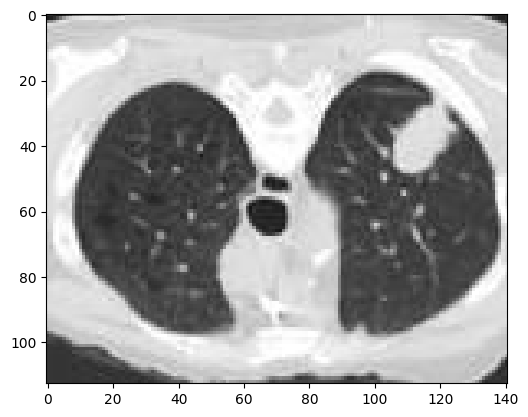

In [5]:
if __name__ == '__main__':
    # --- IMPORTANT ---
    # Create dummy model files and a dummy image for demonstration purposes.
    # In your actual use case, you will replace these paths with your real files.

    # Create a dummy image file if it doesn't exist
    if not os.path.exists('dummy_image.png'):
        try:
            from PIL import Image
            dummy_image = Image.new('RGB', (224, 224), color = 'red')
            dummy_image.save('dummy_image.png')
            print("Created a dummy image: 'dummy_image.png'")
        except ImportError:
            print("Pillow library not found. Cannot create a dummy image.")
            print("Please create a dummy image named 'dummy_image.png' manually.")

    # Create dummy model files (simple sequential models for placeholder)
    try:
        # Dummy VGG16-like model
        if not os.path.exists('vgg16_model.keras'):
            dummy_vgg16 = tf.keras.Sequential([
                tf.keras.layers.Input(shape=(224, 224, 3)),
                tf.keras.layers.GlobalAveragePooling2D(),
                tf.keras.layers.Dense(4, activation='softmax') # Assuming 4 classes
            ])
            dummy_vgg16.save('vgg16_model.keras')
            print("Created a dummy model: 'vgg16_model.keras'")

        # Dummy EfficientNet-like model
        if not os.path.exists('efficientnet_model.keras'):
            dummy_efficientnet = tf.keras.Sequential([
                tf.keras.layers.Input(shape=(224, 224, 3)),
                tf.keras.layers.GlobalAveragePooling2D(),
                tf.keras.layers.Dense(4, activation='softmax') # Assuming 4 classes
            ])
            dummy_efficientnet.save('efficientnet_model.keras')
            print("Created a dummy model: 'efficientnet_model.keras'")

        # --- Configuration ---
        VGG16_MODEL_PATH = 'vgg16_model.keras'
        EFFICIENTNET_MODEL_PATH = 'efficientnet_model.keras'
        IMAGE_TO_PREDICT = '/content/download.jpeg'
        # Define the class names for your model
        CLASS_NAMES = ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

        # --- Run Prediction ---
        average_probabilities = predict_and_average(VGG16_MODEL_PATH, EFFICIENTNET_MODEL_PATH, IMAGE_TO_PREDICT)

        if average_probabilities is not None:
            print("\n--- Prediction Results ---")
            print("Averaged Probabilities:", average_probabilities)

            # Get the class with the highest probability
            predicted_class_index = np.argmax(average_probabilities)
            predicted_class_name = CLASS_NAMES[predicted_class_index]
            highest_probability = average_probabilities[0][predicted_class_index]

            print(f"\nPredicted Class Index: {predicted_class_index}")
            print(f"Predicted Class Name: {predicted_class_name}")
            print(f"Confidence: {highest_probability:.4f}")
            print("------------------------")

    except Exception as e:
        print(f"\nAn error occurred during the main execution block: {e}")
        print("Please ensure TensorFlow is installed ('pip install tensorflow').")